Loading data...

--- Distribution ---
Normal Transactions: 284315
Fraud Transactions: 492


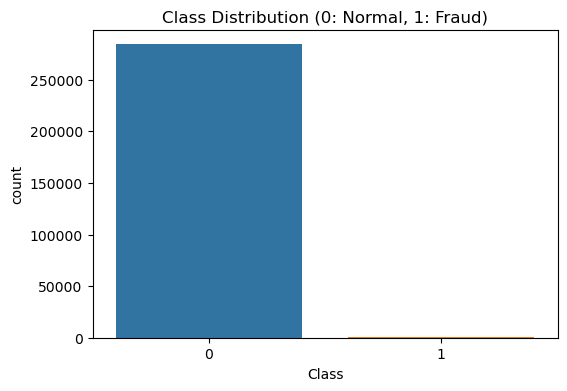

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print("Loading data...")
df = pd.read_csv('creditcard.csv')


counts = df['Class'].value_counts()
print("\n--- Distribution ---")
print(f"Normal Transactions: {counts[0]}")
print(f"Fraud Transactions: {counts[1]}")


plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler


# Using RobustScaler instead of StandardScaler due to extreme outliers in 'Amount'
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop 'Time' column
df = df.drop(['Time'], axis=1)

print("Data scaled and Time column dropped.")
print(df.head())

Data scaled and Time column dropped.
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SMOTE ONLY to Training Data
print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("Data splitting and resampling complete.")

Before SMOTE, counts of label '1': 394
After SMOTE, counts of label '1': 227451
Data splitting and resampling complete.


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


print("Training the Random Forest model... please wait.")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the Test Set
y_pred = rf.predict(X_test)


# Handle NaN values in y_test before evaluation
nan_mask = y_test.isnull()
y_test_cleaned = y_test[~nan_mask]
y_pred_cleaned = y_pred[~nan_mask.values] # Align y_pred with cleaned y_test

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test_cleaned, y_pred_cleaned))
print("\n--- Classification Report ---")
print(classification_report(y_test_cleaned, y_pred_cleaned))

Training the Random Forest model... please wait.

--- Confusion Matrix ---
[[56856     8]
 [   15    83]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



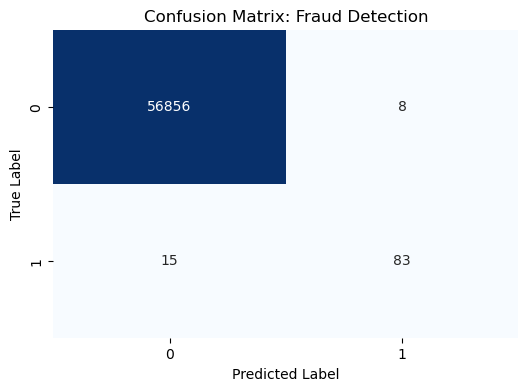

Image saved as confusion_matrix.png!


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = [[56856, 8], [15, 83]]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Fraud Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Image saved as confusion_matrix.png!")